In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import decode_predictions
from keras.models import Model, load_model
import keras.backend as K

import model as tcav_model
import tcav as tcav
import utils as utils
import activation_generator as act_gen
import tensorflow as tf
import utils_plot as utils_plot


from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from numpy.linalg import norm

import pickle
from bunch import bunchify

import cav as cav

from os import listdir
from os.path import isfile, join
import operator
from PIL import Image
from keras.preprocessing import image



Using TensorFlow backend.


In [2]:
model = None
model = load_model('v3_model.h5')

/Users/tyler/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
sess = K.get_session()

endpoints_v3 = dict(
    input=model.inputs[0].name,
    input_tensor=model.inputs[0],
    logit=model.outputs[0].name,
    prediction=model.outputs[0].name,
    prediction_tensor=model.outputs[0],
)

tf.logging.set_verbosity(0)

label_path = '/Users/tyler/Desktop/dissertation/programming/tcav/labels/labels.txt'

mymodel = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], endpoints_v3, 
        'InceptionV3_public', (-1, 1))

## Generate CAV

In [5]:
act_generator = None

working_dir = '/Users/tyler/Desktop/dissertation/programming/tcav'
activation_dir =  working_dir + '/activations/'
cav_dir = working_dir + '/cavs/'
source_dir = working_dir + '/concepts'

target = 'zebra'
concepts = ['striped_texture'] 
#concepts = ['dotted']   

bottlenecks = ['mixed10']

alphas = [0.1]

act_generator = act_gen.ImageActivationGenerator(mymodel, source_dir, activation_dir, max_examples=200)


mytcav = tcav.TCAV(sess,
        target, concepts, bottlenecks,
        act_generator, alphas,
        cav_dir = cav_dir,
        num_random_exp=1)

In [6]:
tf.logging.set_verbosity(1)
results = mytcav.run(run_parallel=False)

INFO:tensorflow:running 1 params
INFO:tensorflow:Running param 0 of 1
INFO:tensorflow:running zebra ['striped_texture', 'random500_0']
['striped_texture', 'random500_0', 'zebra']
INFO:tensorflow:Loaded /Users/tyler/Desktop/dissertation/programming/tcav/activations/acts_striped_texture_mixed10 shape (120, 8, 8, 2048)
INFO:tensorflow:Loaded /Users/tyler/Desktop/dissertation/programming/tcav/activations/acts_random500_0_mixed10 shape (50, 8, 8, 2048)
INFO:tensorflow:/Users/tyler/Desktop/dissertation/programming/tcav/activations/acts_zebra_mixed10 does not exist, Making one...
Level 1:tensorflow:Registering TensorListConcat (None) in gradient.
Level 1:tensorflow:Registering TensorListPushBackBatch (None) in gradient.
Level 1:tensorflow:Registering TensorListPushBack (<function _PushBackGrad at 0x1a31fa4a60>) in gradient.
Level 1:tensorflow:Registering TensorListPopBack (<function _PopBackGrad at 0x1a31fa4c80>) in gradient.
Level 1:tensorflow:Registering TensorListStack (<function _TensorLi

Level 1:tensorflow:Registering InfeedEnqueue (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering InfeedEnqueueTuple (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering LoadTPUEmbeddingADAMParameters (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering LoadTPUEmbeddingADAMParametersGradAccumDebug (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering LoadTPUEmbeddingAdadeltaParameters (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering LoadTPUEmbeddingAdadeltaParametersGradAccumDebug (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring 

Level 1:tensorflow:Registering TPUReplicateMetadata (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering TPUReplicatedInput (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering TPUReplicatedOutput (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering WorkerHeartbeat (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering _XlaSendFromHost (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering _XlaRecvAtHost (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering _Configur

Level 1:tensorflow:Registering ScatterAddNdim (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering CreateTreeVariable (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering DecisionTreeResourceHandleOp (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering FeatureUsageCounts (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering TraverseTreeV4 (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering TreeDeserialize (<function _set_call_cpp_shape_fn.<locals>.call_without_requiring at 0x12a6cd378>) in default shape functions.
Level 1:tensorflow:Registering Tree

In [7]:
results

[{'cav_key': 'striped_texture-random500_0-mixed10-linear-0.1',
  'cav_concept': 'striped_texture',
  'target_class': 'zebra',
  'i_up': 1.0,
  'val_directional_dirs_abs_mean': 0.04495673653310022,
  'val_directional_dirs_mean': -0.04495673653310022,
  'val_directional_dirs_std': 0.02373618804461058,
  'note': 'alpha_0.1 ',
  'alpha': 0.1,
  'bottleneck': 'mixed10'}]

## Load CAV

In [8]:
source_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/cavs/'

cav_path = source_dir + 'striped_texture-random500_0-mixed10-linear-0.1.pkl'
#cav_path = source_dir + 'striped-random500_0-mixed8-linear-0.1.pkl'

this_cav = cav.CAV.load_cav(cav_path)

In [9]:
#this_cav.cavs[0]

## Generate Activations

In [10]:
bottleneck = bottlenecks[0]
target_class = target


acts = act_generator.process_and_load_activations([bottleneck], concepts + [target_class])

act_dotted = acts['striped_texture'][bottleneck]
act_zebra = acts['zebra'][bottleneck]

['striped_texture', 'zebra']
INFO:tensorflow:Loaded /Users/tyler/Desktop/dissertation/programming/tcav/activations/acts_striped_texture_mixed10 shape (120, 8, 8, 2048)
INFO:tensorflow:Loaded /Users/tyler/Desktop/dissertation/programming/tcav/activations/acts_zebra_mixed10 shape (200, 8, 8, 2048)


In [11]:
deriv = mytcav.get_directional_dir(
mymodel,
'zebra',
'striped_texture',
this_cav,
act_zebra
)

In [12]:
len(deriv)

200

In [13]:
dar = np.array(deriv)

In [14]:
dar[dar > 0].shape

(0,)

In [15]:
dar[dar < 0].shape

(200,)

In [16]:
1 - 94/200

0.53

In [17]:
working_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/'

source_images = working_dir + 'concepts/zebra/'
images = [f for f in listdir(source_images) if isfile(join(source_images, f))]
total_images = len(images)

images.sort()
images = images[:200]


In [18]:
len(images)

200

In [19]:
this_d = {}

idx = 0
for d in deriv:
    this_d[idx] = d
    idx += 1

sorted_d = sorted(this_d.items(), key=operator.itemgetter(1),reverse=True)

In [20]:
#this_d

In [21]:
len(sorted_d)

200

In [22]:
xx = 194
top = images[sorted_d[0][0]]
bottom = images[sorted_d[xx][0]]
this_img = bottom
#this_img = top

In [23]:
img_path = source_images + this_img
img = image.load_img(img_path, target_size=(299, 299))

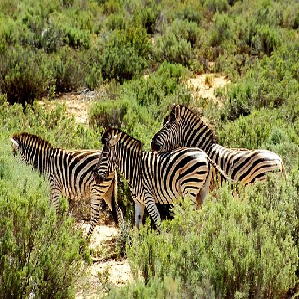

In [24]:
img

## Load filenames

In [25]:
#source_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/cavs/'
path = 'files/f_used_10.pkl'

with open(path, 'rb') as f:
    data = pickle.load(f)
    
image_list = data

In [26]:
image_list

['/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra/img298.jpg',
 '/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra/img1434.jpg',
 '/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra/img1357.jpg',
 '/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra/img796.jpg',
 '/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra/img1344.jpg',
 '/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra/img1101.jpg',
 '/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra/img978.jpg',
 '/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra/img579.jpg',
 '/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra/img858.jpg',
 '/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra/img1377.jpg',
 '/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra/img969.jpg',
 '/Users/tyler/Desktop/dissertation/programming/tcav/concepts/zebra/img152.jpg',
 '/Users/tyler/Desktop/

In [27]:
len(image_list)

200

In [28]:
#sorted_d

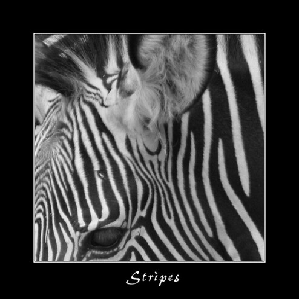

In [83]:
xx = 3
bottom = image_list[sorted_d[xx][0]]
this_img = bottom

img_path = this_img
img = image.load_img(img_path, target_size=(299, 299))

img

In [ ]:
class_acts = acts
for i in range(len(class_acts)):
    print(i)
    act = np.expand_dims(class_acts[i], 0)

In [ ]:
working_dir = '/Users/tyler/Desktop/dissertation/programming/tcav'
activation_dir =  working_dir + '/activations/'
cav_dir = working_dir + '/cavs/'
source_dir = working_dir + '/concepts'

target = 'zebra'
concepts = ['striped'] 
concepts = ['dotted']   

bottlenecks = ['mixed8']


alphas = [0.1]

In [ ]:
activation_dir =  working_dir + '/activations/acts_zebra_mixed9'


with open(activation_dir, 'rb') as f:
    x = np.load(f)
    #data = pickle.load(f)

In [ ]:
x.shape

In [ ]:
#acts

In [ ]:
#images

In [ ]:
source_images

In [ ]:
files = [source_images + i for i in images]
imgs = act_generator.load_images_from_files(files)

In [ ]:
act_zebra.shape

In [ ]:
8 * 8 * 1280

In [ ]:
a = act_dotted[0].reshape(81920)
b = act_zebra[1].reshape(81920)

In [ ]:
cos_sim(a,b)

In [ ]:
cos_sim(dotted_cav,b)

In [ ]:
a = np.ones(4)
b = np.ones(4) * -1
b[3]  = -2

In [ ]:
a

In [ ]:
b

In [ ]:
cos_sim(a,b)

In [ ]:
def cos_sim(a,b):
    return np.dot(a, b)/(norm(a)*norm(b))